In [46]:

from __future__ import  division

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels import tsa
from datetime import date, datetime, timedelta
import copy
import scipy as sp
from scipy.optimize import fsolve

from cycler import cycler
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.dates

# Plotting and display options
np.set_printoptions(precision=10)
pd.set_option('precision', 8)
pd.set_option('display.float_format', lambda x: '%.8f' % x)

plt.style.use('ggplot')


# this allows plots to appear directly in the notebook
get_ipython().magic(u'matplotlib inline')


In [47]:
df = pd.read_csv("MBS.csv", index_col='Date')
df.columns = ['10y','FNCL2.5','FNCL3','FNCL3.5','FNCL4','FNCL4.5','FNCL5','FNCL5.5','FNCL6','FNCL6.5']


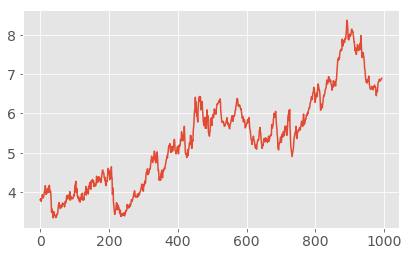

In [48]:
plt.plot(range(len(df.index)), df['10y'])
#plt.plot(range(len(df.index)), df['FNCL2.5'])

def phrase(y, price, coupon):
    spread = []
    for r in y:
        spread.append(coupon - r)
        
    inx = []
    prices = []
    for ind in range(len(y)):
        if price[ind] != ' ':
            inx.append(spread[ind])
            prices.append(price[ind])
    return inx, prices

In [49]:
ind_25, prices_25 = phrase(df['10y'],df['FNCL2.5'], 2.5)
ind_3, prices_3 = phrase(df['10y'],df['FNCL3'], 3)
ind_35, prices_35 = phrase(df['10y'],df['FNCL3.5'], 3.5)
ind_4, prices_4 = phrase(df['10y'],df['FNCL4'], 4)
ind_45, prices_45 = phrase(df['10y'],df['FNCL4.5'], 4.5)
ind_5, prices_5 = phrase(df['10y'],df['FNCL5'], 5)
ind_55, prices_55 = phrase(df['10y'],df['FNCL5.5'], 5.5)
ind_6, prices_6 = phrase(df['10y'],df['FNCL6'], 6)
ind_65, prices_65 = phrase(df['10y'],df['FNCL6.5'], 6.5)




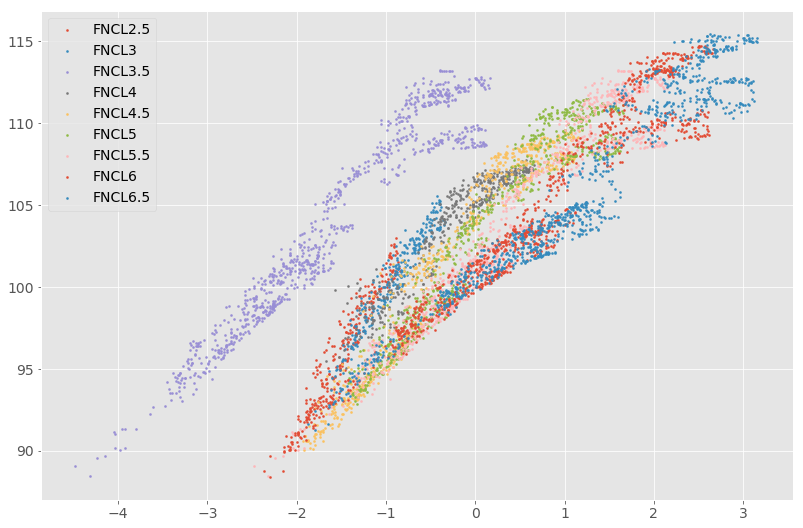

In [55]:
#plt.plot(range(len(df.index)), df['10y'])

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.scatter(ind_25, prices_25 ,label = 'FNCL2.5',s=4)
plt.scatter(ind_3, prices_3 ,label = 'FNCL3',s=4)
plt.scatter(ind_35, prices_35 ,label = 'FNCL3.5',s=4)
plt.scatter(ind_4, prices_4 ,label = 'FNCL4',s=4)
plt.scatter(ind_45, prices_45 ,label = 'FNCL4.5',s=4)
plt.scatter(ind_5, prices_5 ,label = 'FNCL5',s=4)
plt.scatter(ind_55, prices_55 ,label = 'FNCL5.5',s=4)
plt.scatter(ind_6, prices_6 ,label = 'FNCL6',s=4)
plt.scatter(ind_65, prices_65 ,label = 'FNCL6.5',s=4)




plt.legend()
plt.show()

In [51]:
fig_size = plt.rcParams["figure.figsize"]

In [52]:
fig_size

[6.0, 4.0]

In [53]:
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size